In [1]:
!pip install google-cloud-vision

     |████████████████████████████████| 440kB 4.6MB/s 


In [0]:
import io
import os
from google.cloud import vision
from datetime import datetime
import cv2
from PIL import Image

In [0]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'service.json'


In [0]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

In [19]:
!unzip intern.zip

Archive:  intern.zip
   creating: intern/
   creating: intern/train/
   creating: intern/train/crop_h1/
  inflating: intern/train/crop_h1/I00000.png  
  inflating: intern/train/crop_h1/I00001.png  
  inflating: intern/train/crop_h1/I00002.png  
  inflating: intern/train/crop_h1/I00003.png  
  inflating: intern/train/crop_h1/I00004.png  
  inflating: intern/train/crop_h1/I00005.png  
  inflating: intern/train/crop_h1/I00006.png  
  inflating: intern/train/crop_h1/I00007.png  
  inflating: intern/train/crop_h1/I00008.png  
  inflating: intern/train/crop_h1/I00009.png  
  inflating: intern/train/crop_h1/I00010.png  
  inflating: intern/train/crop_h1/I00011.png  
  inflating: intern/train/crop_h1/I00012.png  
  inflating: intern/train/crop_h1/I00013.png  
  inflating: intern/train/crop_h1/I00014.png  
  inflating: intern/train/crop_h1/I00015.png  
  inflating: intern/train/crop_h1/I00016.png  
  inflating: intern/train/crop_h1/I00017.png  
  inflating: intern/train/crop_h1/I00018.png  
  i

In [0]:
SOURCE_PATH = "intern/train/"

---------- Start recognize  --------
license_plate: 1B4 9951
AUTCDILY APM Brno,
531 042 6:2, APM www.apm.Cz

license_plate: 1B4
license_plate: 9951
license_plate: AUTCDILY
license_plate: APM
license_plate: Brno,
license_plate: 531
license_plate: 042
license_plate: 6:2,
license_plate: APM
license_plate: www.apm.Cz
---------- End ----------


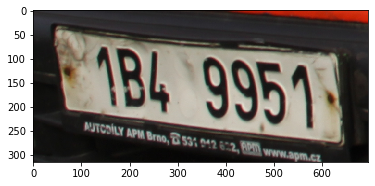

In [24]:
def recognize_license_plate(img_path):

    start_time = datetime.now()
    # Create google vision client
    client = vision.ImageAnnotatorClient()

    # Read image file
    with io.open(img_path, 'rb') as image_file:
      content = image_file.read()

    image = vision.types.Image(content=content)

    # Recognize text
    response = client.text_detection(image=image)
    texts = response.text_annotations

    for text in texts:
      license_plate = text.description
      print('license_plate: {}'.format(license_plate))



    # Read image with opencv
    img = cv2.imread(img_path)

    # Get image size
    height, width = img.shape[:2]

    # Scale image
    img = cv2.resize(img, (800, int((height * 800) / width)))

    # Create new img path for google vision
    img_path = SOURCE_PATH + "output.jpg"
   

print('---------- Start recognize  --------')
path = SOURCE_PATH + 'crop_m4/I00001.png'
img = mpimg.imread(path) 
plt.imshow(img) 
recognize_license_plate(path)
print('---------- End ----------')